In [18]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 입국심사

- 프로그래머스 **이진탐색** 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/43238

# 문제 설명

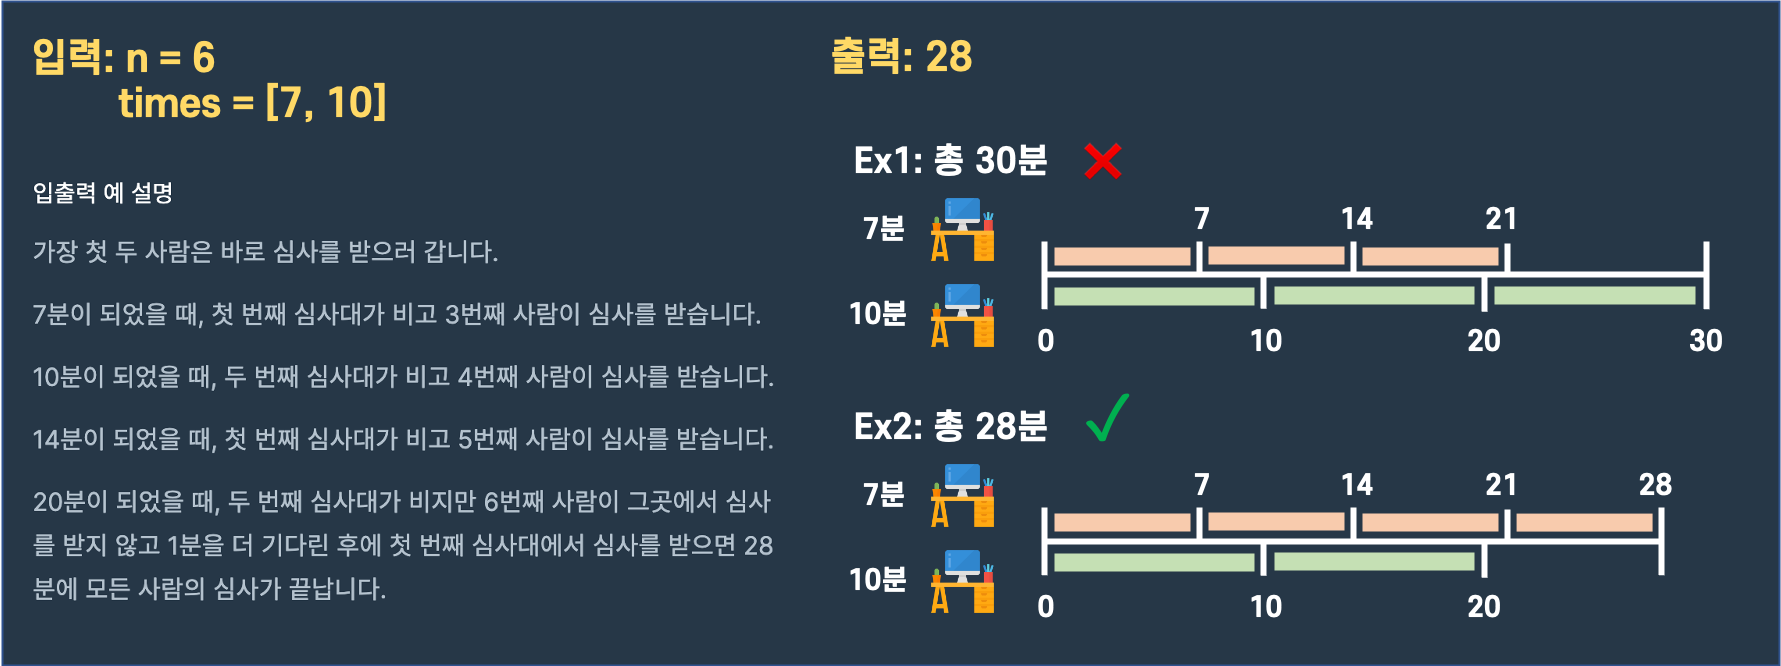

In [19]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/2-summary.png", height=400)

<설명>

입국 심사를 받아야하는 사람 수 n이 주어지고

입국 심사를 할 수 있는 각 심사대에서 걸리는 시간이 times 로 주어집니다.

위 예시처럼 n=6이고 times=[7,10] 일 때, 처음에는 두 심사대에 모두 사람이 심사를 받고, 각 심사대에서 끝날 때마다 다음 사람이 심사를 받습니다.

심사가 끝나면 무조건 그 다음 사람이 들어가면 안되는데, Example 1은 20분에서 10분짜리 심사대가 끝나서 바로 다음 사람이 들어간 경우 30분이 걸립니다. 그러나 Example 2처럼 20분에 10분짜리 심사대가 끝나도 21분까지 기다려서 7분짜리 심사대를 들어가면 28분에 끝낼 수 있습니다.

이처럼 **모든 사람이 심사를 받는데 걸리는 시간을 최소로 하는 것이 목적**입니다.

<br>
<br>
<br>





# 시행착오

한 사람이 들어갈 때마다 최소로 끝나는 시간을 tmin에 저장

매순간 가장 최적의 선택을 함 (그리드 알고리즘)


**1. 한 사람이 들어갈 때마다 - for문** <br>
**2. 각 심사대에 들어갈 때 언제 끝날지 계산하여 최소로 끝나는 방법을 선택 - for문**

In [20]:
def solution(n, times):
    answer = 0
    waiting = times.copy()
    
    for i in range(n-2):
        tmin = waiting[0] + times[0]
        tidx = 0
        for j in range(1,len(times)):
            if waiting[j] + times[j] < tmin:
                tmin = waiting[j] + times[j]
                tidx = j
        waiting[tidx] += times[tidx]
        answer = tmin
    return answer

In [21]:
solution(6, [7,10]) # 28, 그러나 답이 틀리거나 시간 초과로 채점 프로그램 통과할 수 없음

28

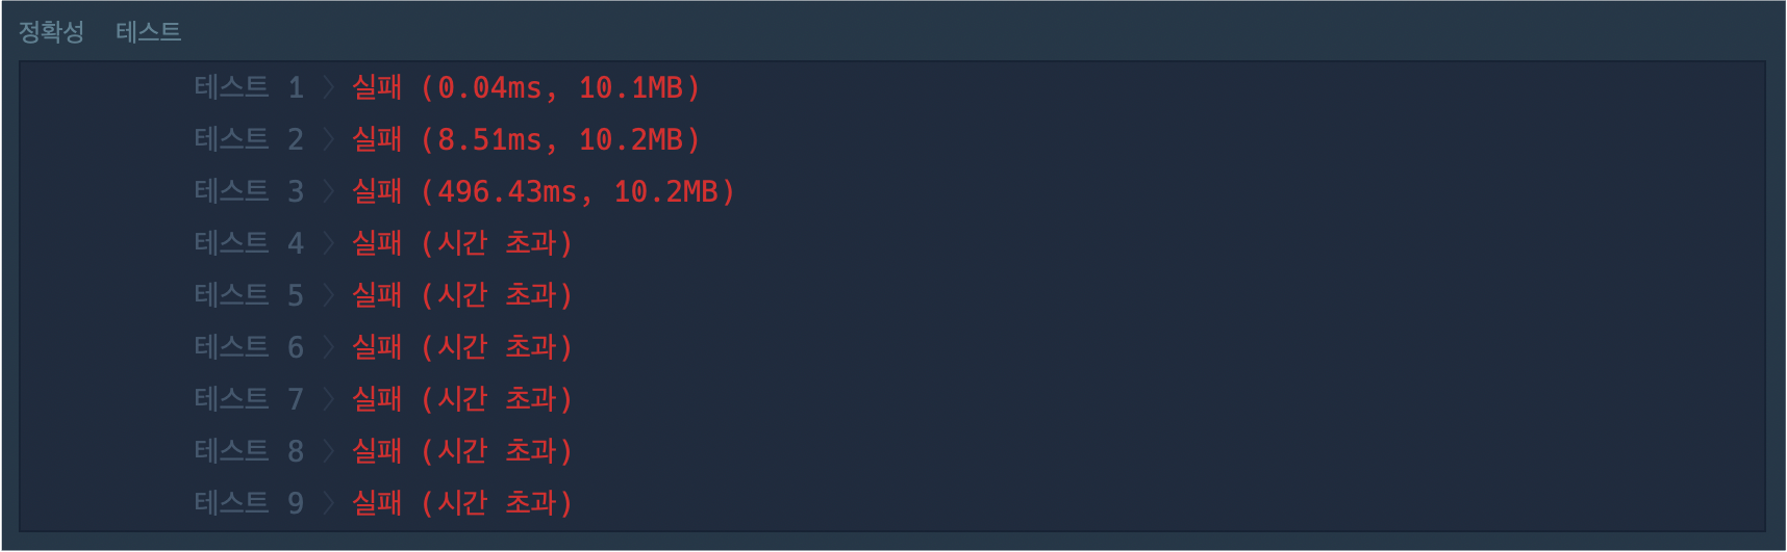

In [22]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/2-failure.png", height=250)

<br>
<br>
<br>





# 풀이
- 이진 탐색 O(logn)

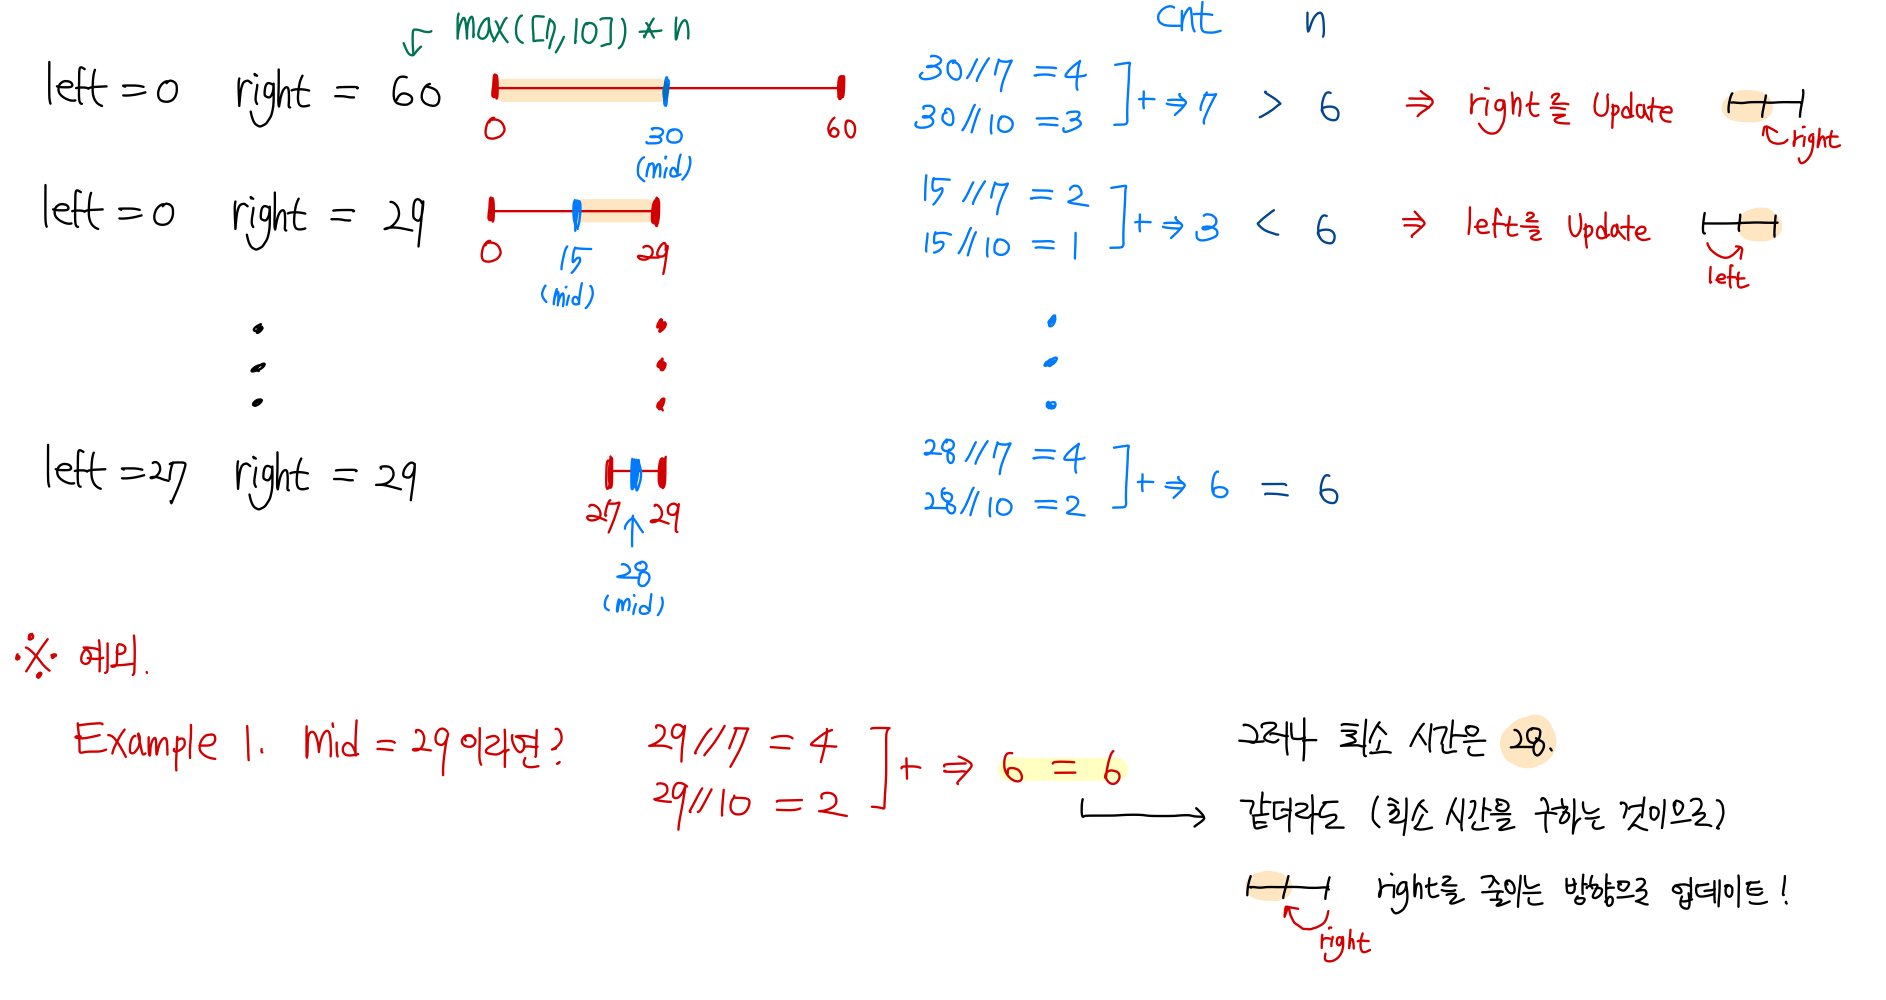

In [23]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/2-code.jpeg", height=500)

<설명>

모든 사람이 심사받는데 걸리는 시간의 최댓값은 가장 오래걸리는 심사대에 모든 사람이 들어갔을 때를 기준으로, 심사받는데 걸리는 시간을 이분 탐색한다.

left = 0, right = max([7, 10])*n 으로 두고, 중앙값을 걸리는 시간이라고 가정했을 때 각 심사대에서 심사할 수 있는 사람 수를 구해본다. 병렬로 심사하니까 각각을 걸리는 시간으로 나눠서 모두 더하면 되고, 이를 심사해야하는 사람 수와 비교한다.

심사할 수 있는 사람 cnt가 심사해야하는 n보다 큰 경우 심사에 걸리는 시간이 더 줄어들어도 되는 것이고, 따라서 right를 업데이트한다. 반대의 경우에는 left를 업데이트 한다.

이를 반복하여 구하면 cnt와 n이 같은 경우를 찾을 수 있다.

다만 예외가 있는데, 만약 mid (중앙값) = 29일 때, cnt는 6이지만 사실 최소 시간은 29가 아닌 28이다. 따라서 cnt와 n이 같더라도 무조건 반복문을 종료하지 않으며, 시간을 더 줄일 수 있는 경우를 찾기 위해서 이 경우에도 right를 줄이는 방향으로 업데이트한다.

In [24]:
def solution(n, times):
    answer = 0
    left = 0
    right = max(times)*n

    while left <= right:
        mid = (left + right)//2
        cnt = 0

        for time in times:
            cnt += mid//time
            
        if cnt >= n: 
            answer = mid
            right = mid - 1 # mid의 왼쪽 부분으로 한정
        
        elif cnt < n: 
            left = mid + 1 # mid의 오른쪽 부분으로 한정
            
    return answer

In [25]:
solution(6, [7,10])

28

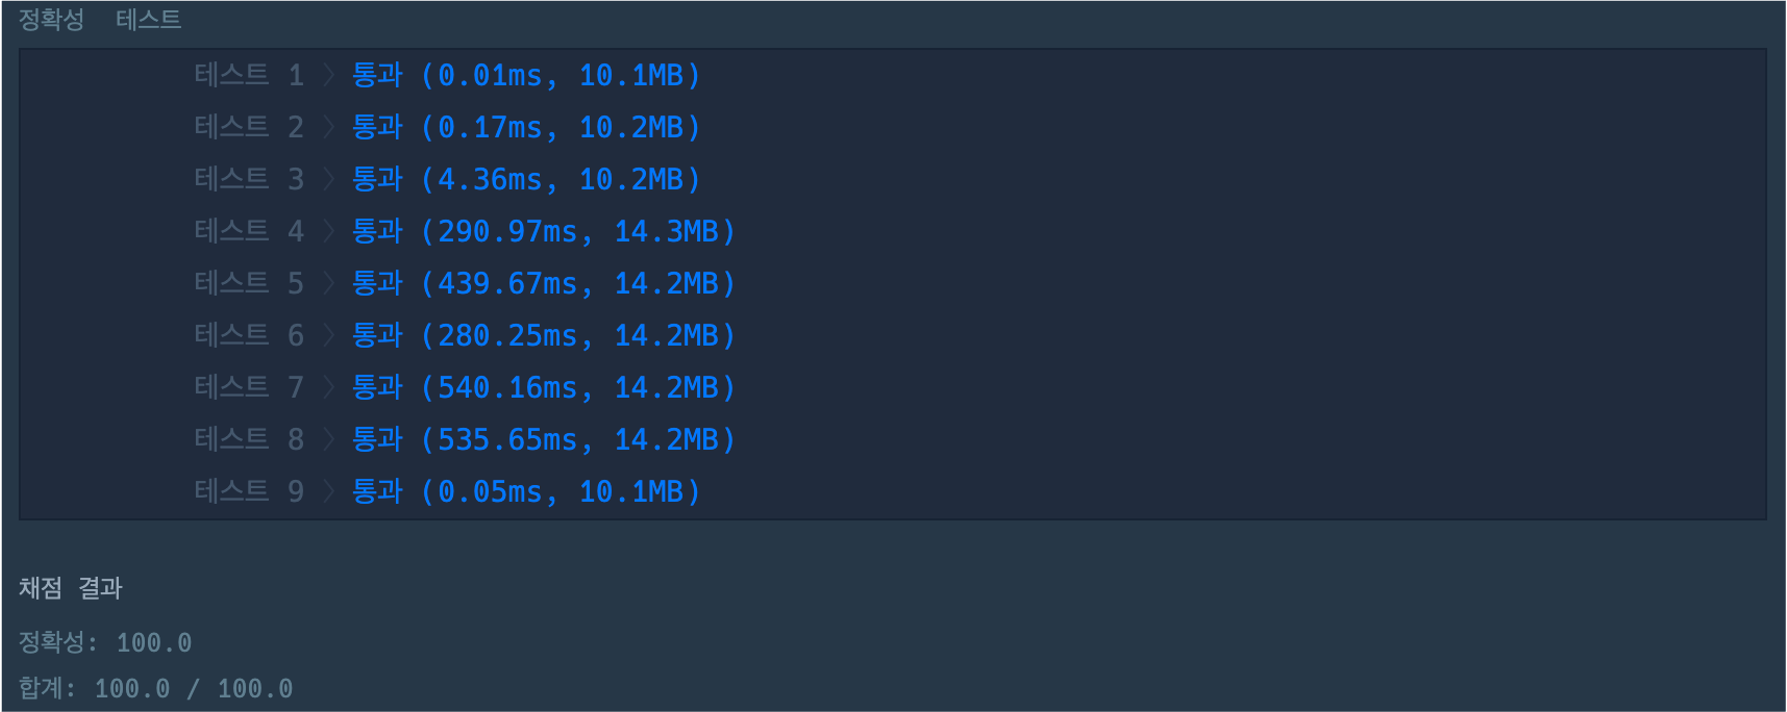

In [27]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/2-success.png", height=300)